<h1>Лабораторна робота №7 <br>З основ аналізу БМД</h1>
<h2>Виконав:<br>Яцина Денис<h2>

In [2]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import math
from numpy.random import randint
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_1 = randint(60, 90, 31)
df_2 = randint(75, 130, 31)
data = pd.DataFrame({"До вправ":df_1 , "Після вправ":df_2 ,})
data.index.name = '№ учасника'
data.columns.name = 'Пульс'
n=data.shape[0]
data


Пульс,До вправ,Після вправ
№ учасника,,
0,79,128
1,77,114
2,84,89
3,63,126
4,66,103
5,63,95
6,76,106
7,80,106
8,78,108


[]

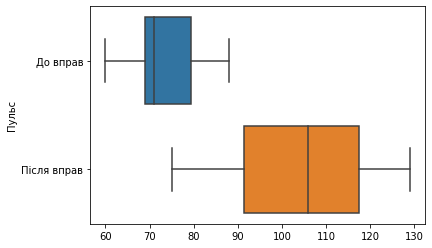

In [3]:
sns.boxplot(data = data, orient = 'h').set()

1.Написати функції:

-для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту та результат оцінки рівності дисперсій (significant або not significant).

-для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [19]:
def sd(arr):
    s=0
    mean=(sum(arr))/n
    for i in range (n):
        s+=((arr[i]-mean))**2
    return s/(n-1)

def Liven(data):
    s1 = sd(data["До вправ"])
    s2 = sd(data["Після вправ"]) 
    F = None
    if(s1>s2):
        F = s1/s2
    else:
        F = s2/s1
    print('Отримане значення критерію Лівеня : F = ' + str(F))
    df = df1 = df2 = 12
    print('Значення ступенів свободи: df = ' + str(df))
    table = pd.read_excel( r'Таблиця_критичних_значень_для_критерію_Лівеня.xlsx', encoding='utf-8').iloc[df1,df2]
    print("Критичне значення критерію Лівеня = " + str(table))
    if F<table:
        result = "Оскільки значення критерію Лівеня менше, ніж його критичне значення, то результат оцінки значимості зв'зку - not significant"
    else:
        result = "Оскільки значення критерію Лівеня більше, ніж його критичне значення, то результат оцінки значимості зв'зку -  significant"
    return result

In [5]:
def Student(data, level):
    s1 = sd(data["До вправ"])
    s2 = sd(data["Після вправ"])
    df = 2*n - 2
    N = n
    if level == 'significant':
        t = (abs((sum(data["До вправ"])/N) - (sum(data["Після вправ"])/N)))/math.sqrt((s1 / N) + (s2 / N))
    else:
        t = (abs((sum(data["До вправ"])/N) - (sum(data["Після вправ"])/N))) / math.sqrt(((N - 1)*s1 + (N - 1)*s2)*((1/N)+(1/N)) / df)
    print('Отримане значення критерію Стьюдента: t = ' + str(t))
    print('Значення ступеня свободи: df = ' + str(df))
    table = pd.read_excel(r'Таблиця_критичних_значень_для_критерію_Стьюдента.xlsx', encoding='utf-8').iloc[df, 1]
    print("Критичне значення критерію Стьюдента = " + str(table))
    result = ("significant") if t < table else "not significant"
    print("Результат оцінки значимості зв'зку: " + result)
    return t, df, result

In [20]:
Liven(data)

Отримане значення критерію Лівеня : F = 3.0882881179695625
Значення ступенів свободи: df = 12
Критичне значення критерію Лівеня = 2.51


"Оскільки значення критерію Лівеня більше, ніж його критичне значення, то результат оцінки значимості зв'зку -  significant"

In [24]:
Student(data,'significant')

Отримане значення критерію Стьюдента: t = 9.296262859908056
Значення ступеня свободи: df = 60
Критичне значення критерію Стьюдента = 2.0
Результат оцінки значимості зв'зку: not significant


(9.296262859908056, 60, 'not significant')